In [15]:
#Read in CSV into pandas DataFrame. Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, plot_roc_curve, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from statsmodels.api import qqplot
from scipy import stats
df = pd.read_csv('data/cell2celltrain.csv')

BUSINESS UNDERSTADING:
Build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem.

Most naturally, your audience here would be the telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. The question you can ask is: are there any predictable patterns here?


STAKEHOLDER: TELECOM

PROBLEM: The stakeholder has approached up to find out how they can reduce churn.

In [16]:
df.head()
#churn is target 

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [17]:
df.info()
#51047 entries collceted. 
#57 columns 
# churn is an object.  Listed as Yes or No


# Categorial variabes include : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [34]:
for column in list(df.columns):
    print(column, sum(df[column].isnull()))
#Columns with missing values : 
#MonthlyRevenue 156
#MonthlyMinutes 156
#TotalRecurringCharge 156
#DirectorAssistedCalls 156
#OverageMinutes 156
#RoamingCalls 156
#PercChangeMinutes 367
#PercChangeRevenues 36
#ServiceArea 24
#Handsets 1
#HandsetModels 1
#CurrentEquipmentDays 1
#AgeHH1 909
#AgeHH2 909

CustomerID 0
Churn 0
MonthlyRevenue 156
MonthlyMinutes 156
TotalRecurringCharge 156
DirectorAssistedCalls 156
OverageMinutes 156
RoamingCalls 156
PercChangeMinutes 367
PercChangeRevenues 367
DroppedCalls 0
BlockedCalls 0
UnansweredCalls 0
CustomerCareCalls 0
ThreewayCalls 0
ReceivedCalls 0
OutboundCalls 0
InboundCalls 0
PeakCallsInOut 0
OffPeakCallsInOut 0
DroppedBlockedCalls 0
CallForwardingCalls 0
CallWaitingCalls 0
MonthsInService 0
UniqueSubs 0
ActiveSubs 0
ServiceArea 24
Handsets 1
HandsetModels 1
CurrentEquipmentDays 1
AgeHH1 909
AgeHH2 909
ChildrenInHH 0
HandsetRefurbished 0
HandsetWebCapable 0
TruckOwner 0
RVOwner 0
Homeownership 0
BuysViaMailOrder 0
RespondsToMailOffers 0
OptOutMailings 0
NonUSTravel 0
OwnsComputer 0
HasCreditCard 0
RetentionCalls 0
RetentionOffersAccepted 0
NewCellphoneUser 0
NotNewCellphoneUser 0
ReferralsMadeBySubscriber 0
IncomeGroup 0
OwnsMotorcycle 0
AdjustmentsToCreditRating 0
HandsetPrice 0
MadeCallToRetentionTeam 0
CreditRating 0
PrizmCode 0
Occupatio

In [18]:
df['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
df['Churn'].value_counts()
# INTEGERS 
# More Nos than Yes

No     36336
Yes    14711
Name: Churn, dtype: int64

In [30]:
df['Churn']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51047, dtype: object

<AxesSubplot:xlabel='Churn', ylabel='count'>

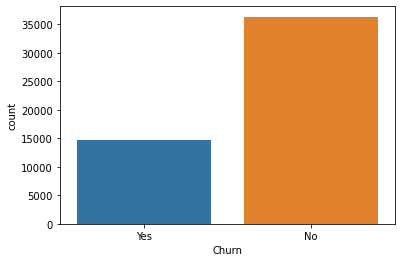

In [38]:
sns.countplot(x=df.Churn)

In [20]:
df.describe()
#

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


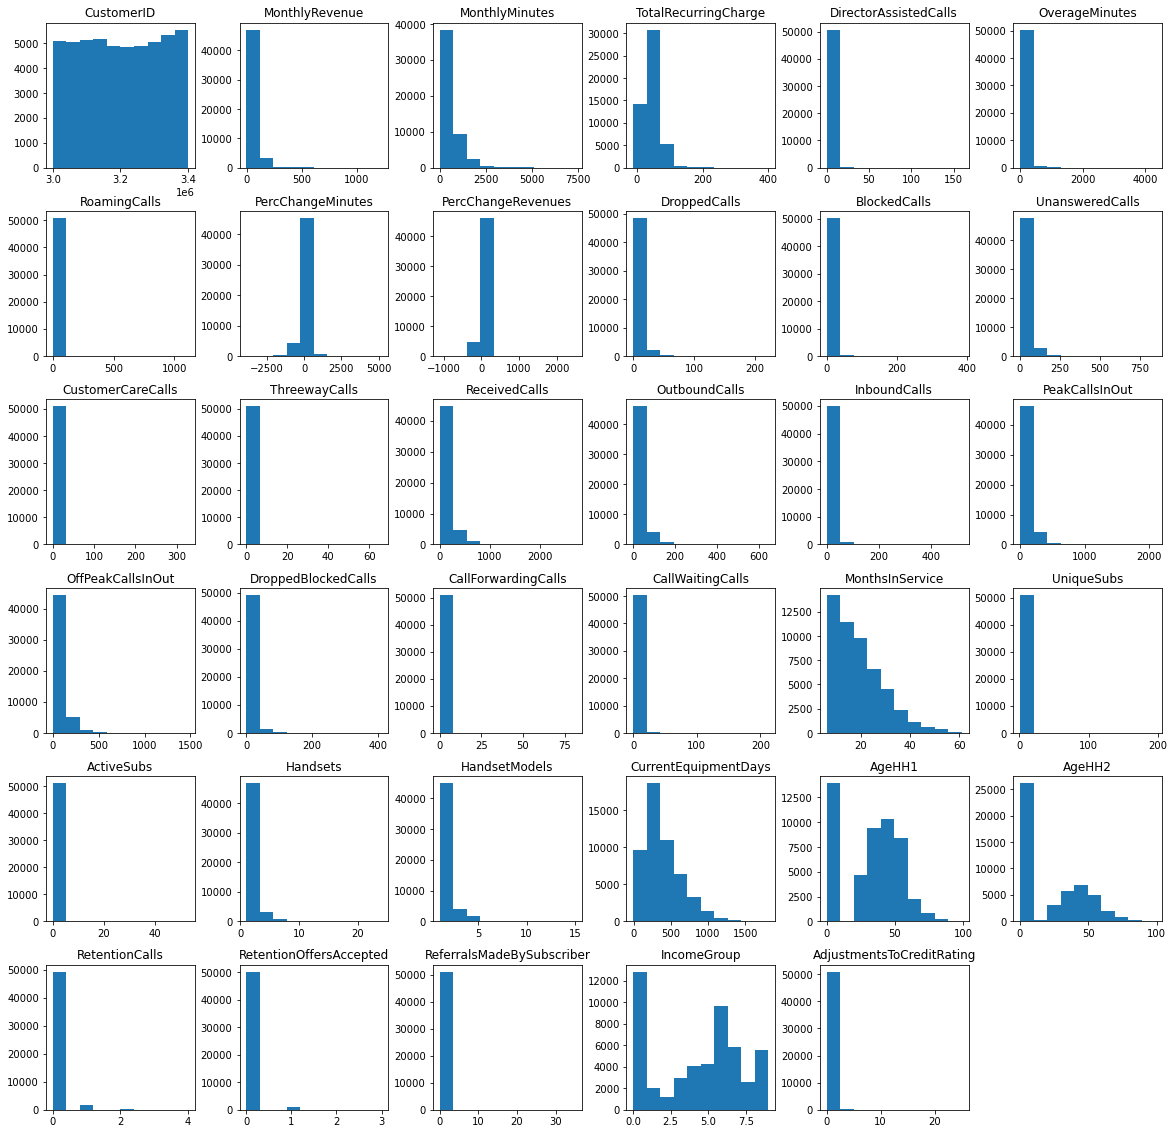

In [21]:
df.hist(grid=False, figsize=(20,20)); 

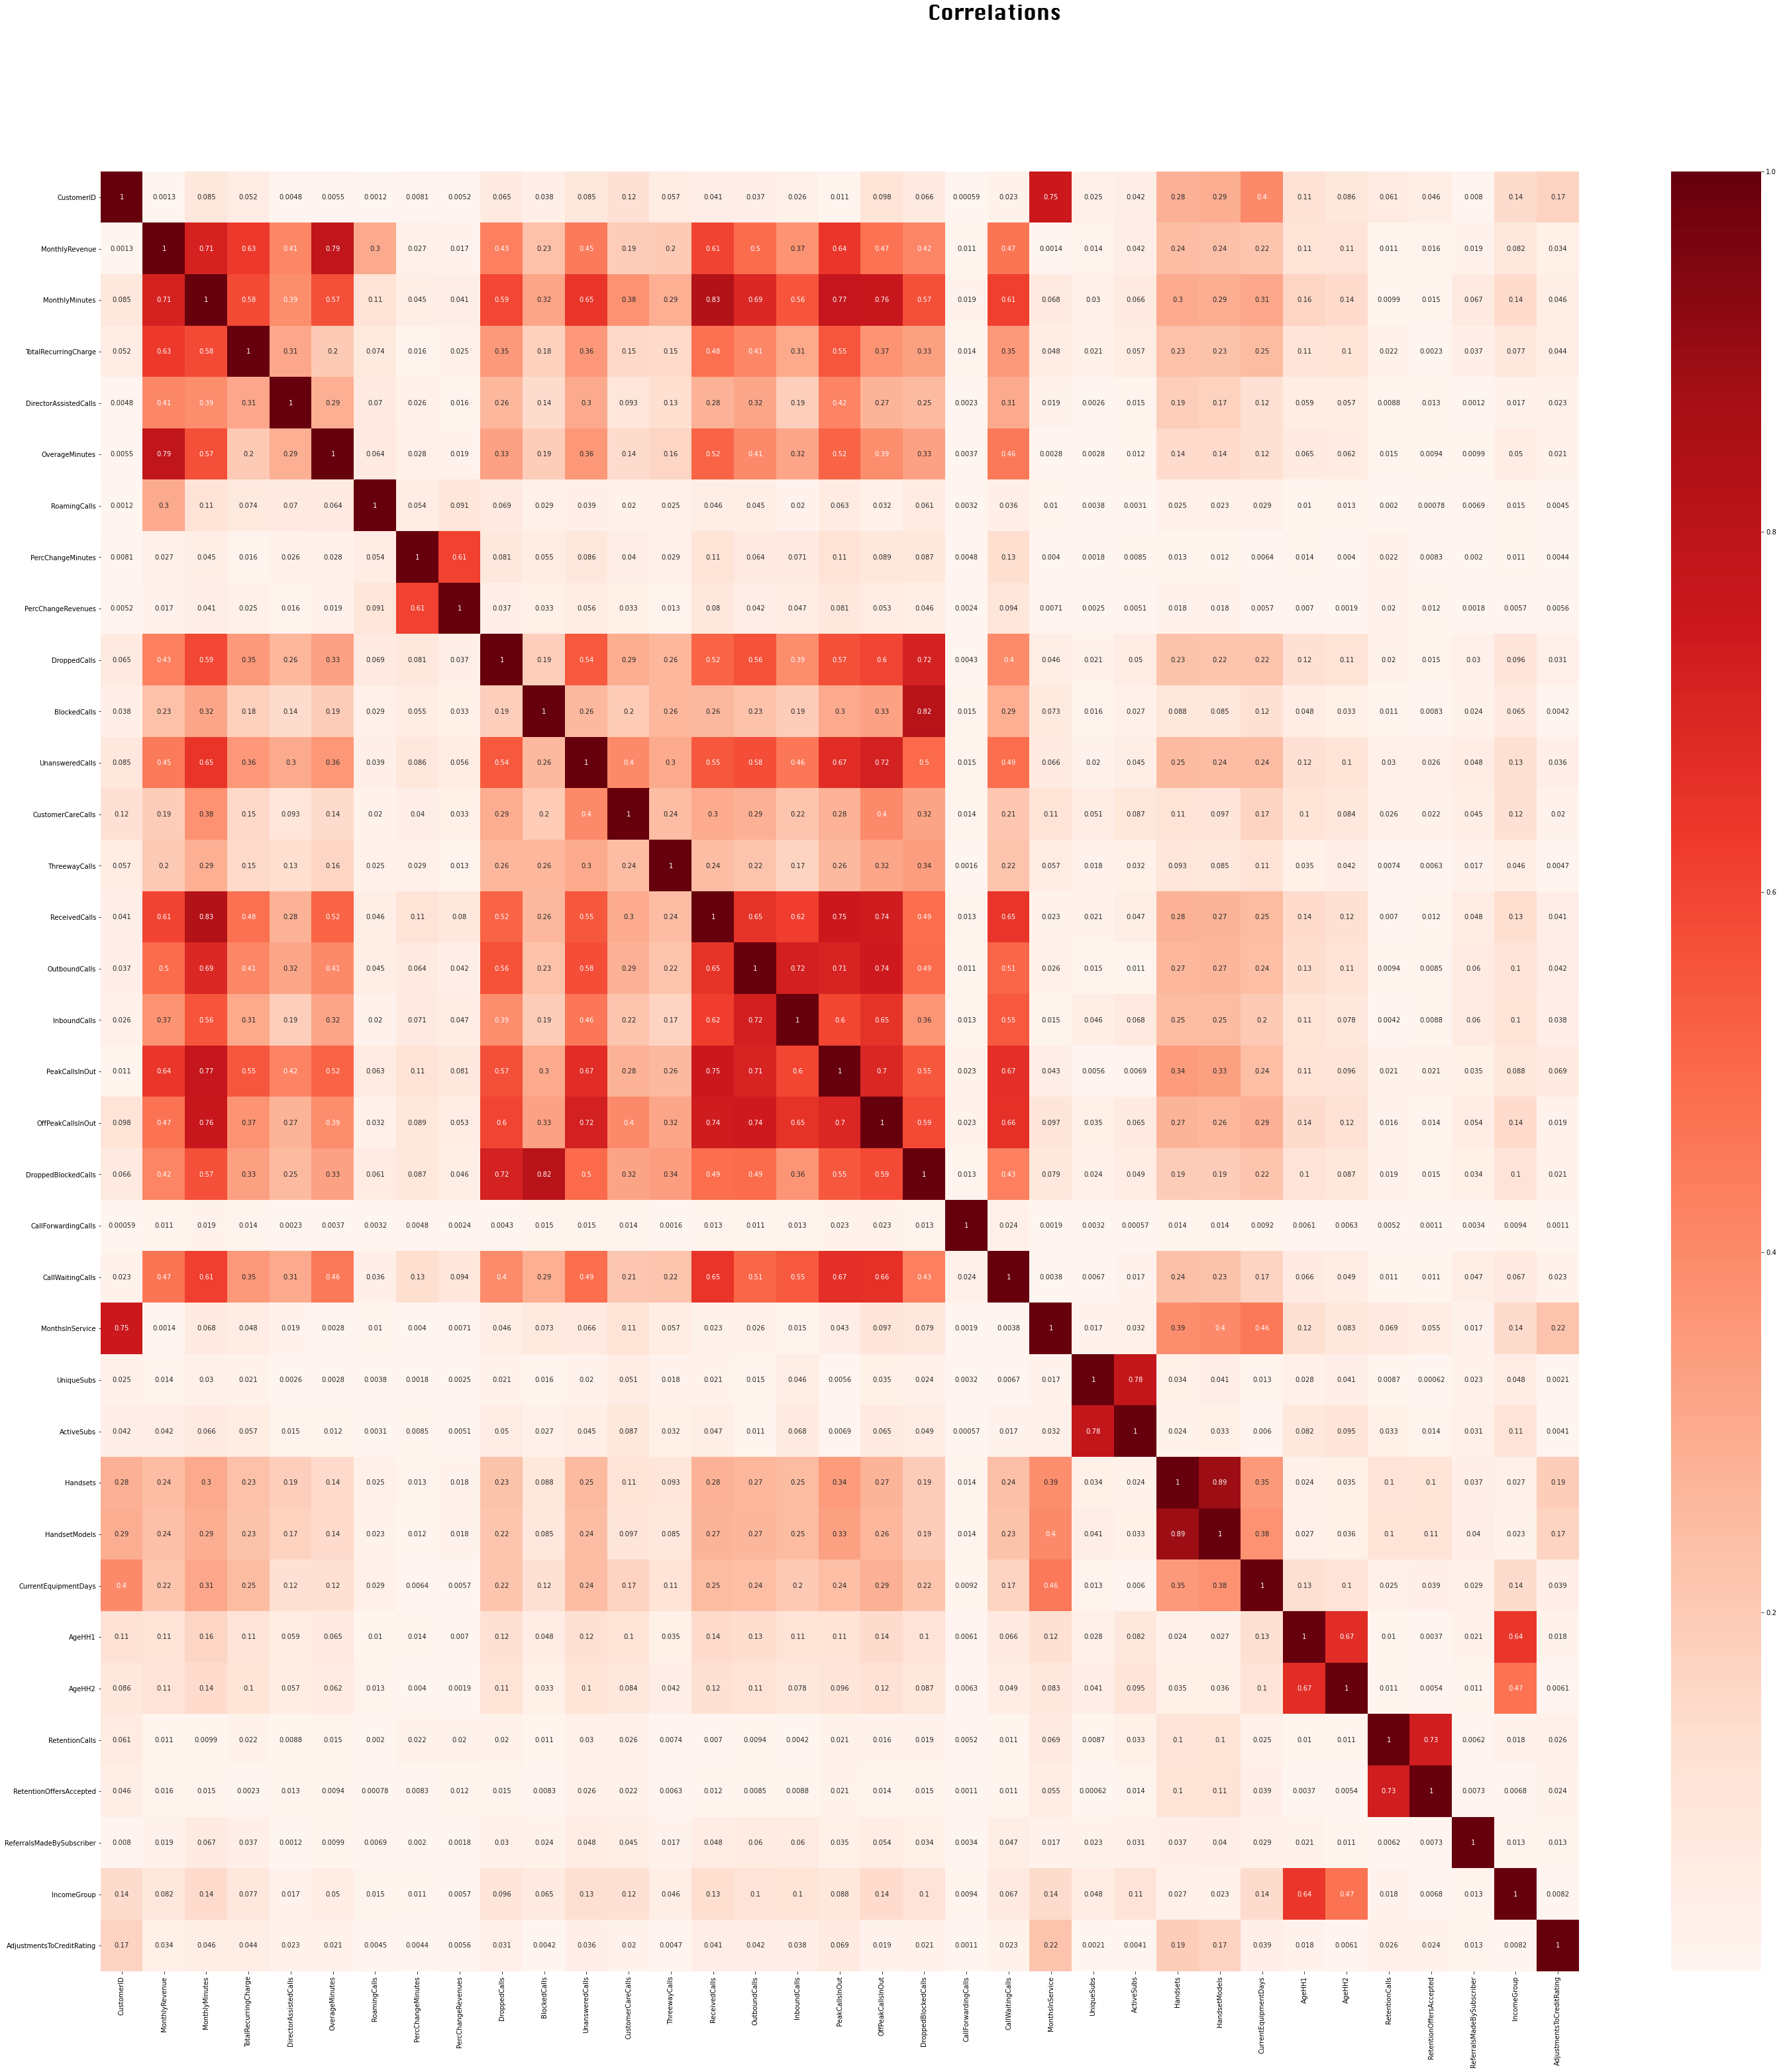

In [26]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(50,50))
fig.suptitle('Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
# NO STRONG CORRELATIONS BETWEEN COLUMNS 
#STRONGEST CORRELATION TO CHURN  IS .21  AT  TOTAL DAY MINUTES. TOTAL DAY CHARGE.CUSTOMER SERVICE CHARGE. 

In [36]:
churn_df=df[df['Churn']=='Yes']
non_churn_df= df[df['Churn']=='No']
churned= df[df['Churn']=='Yes'].shape[0]
notchurned= df[df['Churn']=='No'].shape[0]
print("Total Churned customer {} ".format(churned))

Total Churned customer 14711 


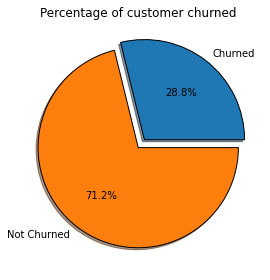

In [37]:
slices=[churned,notchurned]
labels=['Churned','Not Churned']
explode=[0.1,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},shadow=True,autopct='%1.1f%%')
plt.title("Percentage of customer churned")
plt.tight_layout()
plt.show()

In [39]:
#doing a describe on all catgorical columns. seeing their unique entrys and most often entries.
df.select_dtypes(include=['object']).describe()

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
count,51047,51023,51047,51047,51047,51047,51047,51047,51047,51047,...,51047,51047,51047,51047,51047,51047,51047,51047,51047,51047
unique,2,747,2,2,2,2,2,2,2,2,...,2,2,2,2,16,2,7,4,8,3
top,No,NYCBRO917,No,No,Yes,No,No,Known,No,No,...,Yes,No,No,No,Unknown,No,2-High,Other,Other,Unknown
freq,36336,1684,38679,43956,46046,41524,46894,33987,32596,31821,...,34503,41223,44012,50368,28982,49302,18993,24655,37637,19700


In [40]:
df['ServiceArea']

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51047, dtype: object

In [41]:
df.dropna(how='any', inplace=True)df

df.drop("CustomerID", axis=1, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      49752 non-null  object 
 1   MonthlyRevenue             49752 non-null  float64
 2   MonthlyMinutes             49752 non-null  float64
 3   TotalRecurringCharge       49752 non-null  float64
 4   DirectorAssistedCalls      49752 non-null  float64
 5   OverageMinutes             49752 non-null  float64
 6   RoamingCalls               49752 non-null  float64
 7   PercChangeMinutes          49752 non-null  float64
 8   PercChangeRevenues         49752 non-null  float64
 9   DroppedCalls               49752 non-null  float64
 10  BlockedCalls               49752 non-null  float64
 11  UnansweredCalls            49752 non-null  float64
 12  CustomerCareCalls          49752 non-null  float64
 13  ThreewayCalls              49752 non-null  flo

In [47]:
df.drop(['Occupation', 'PrizmCode','HandsetPrice','MaritalStatus', 'NotNewCellphoneUser','Homeownership'], axis = 1)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,Yes,1,0,No,0,4,No,0,Yes,1-Highest
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,Yes,0,0,Yes,0,5,No,0,No,4-Medium
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,Yes,0,0,Yes,0,6,No,0,No,3-Good
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,Yes,0,0,Yes,0,6,No,0,No,4-Medium
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,Yes,0,0,No,0,9,No,1,No,1-Highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,...,Yes,0,0,No,0,4,No,0,No,2-High
51037,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,...,Yes,0,0,No,0,3,No,0,No,3-Good
51040,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,...,Yes,0,0,No,0,7,No,0,No,1-Highest
51041,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,...,Yes,0,0,No,0,2,No,0,No,5-Low


In [51]:
df.replace(to_replace=‘Yes’, value=1, inplace=True)
df.replace(to_replace=‘No’, value=0, inplace=True)
df

SyntaxError: invalid character in identifier (<ipython-input-51-5f94cefb75e8>, line 1)